In [1]:
import sys
sys.path.append('..')
from src.kitti import *
import numpy as np
import cv2
%matplotlib inline

Read frame transformations from KITTI sequence 00 into a list of frames (frame).

In [21]:
IMAGE_SIZE = 400

def load(file):
    keyframeids, frameids, poses = load_keyframes(file)
    return keyframeids, frameids, poses.reshape(poses.shape[0], 4, 4)

def load_csv(file):
    poses = np.genfromtxt(file, delimiter= " ")
    poses = np.hstack([poses, np.repeat(np.array([[0,0,0,1.0]]), len(poses), axis=0) ])
    return poses.reshape(poses.shape[0], 4, 4)

def transform(poses):
    points = np.repeat(np.array([[0,0,0,1.0]]), len(poses), axis=0) 
    for i in range(1, len(poses)):
        points[:i] = np.dot(points[:i], poses[i].T)
    return points
        
def transform2(poses):
    points = poses[:,:,3]
    return points
   
def transform3(poses):
    points = np.repeat(np.array([[0,0,0,1.0]]), len(poses), axis=0) 
    for i in range(1, len(poses)):
        points[i] = np.dot(points[i], poses[i].T)
    return points
    
def plot_trajectory(points):
    # remove y coordinate (we only use x and z to plot a view from above)
    points = points[:, [0,2,3]]
    # compute min and max
    pmin = points.min(axis=0)
    pmax = points.max(axis=0)
    maxxy = max(pmax[0] - pmin[0], pmax[1] - pmin[1])

    t = np.eye(3, dtype=np.float64)
    t[0,0] = IMAGE_SIZE / maxxy
    t[1,1] = -IMAGE_SIZE / maxxy
    t[0,2] = -pmin[0] * IMAGE_SIZE / maxxy
    t[1,2] = + pmin[1] / maxxy

    return np.dot(points, t.T)
    

def plot_trajectory2(points):
    # remove y coordinate (we only use x and z to plot a view from above)
    points = points[:, [0,2,3]]
    # compute min and max
    pmin = points.min(axis=0)
    pmax = points.max(axis=0)
    maxxy = max(pmax[0] - pmin[0], pmax[1] - pmin[1]) * 1.01

    t = np.eye(3, dtype=np.float64)
    t[0,0] = IMAGE_SIZE / maxxy
    t[1,1] = -IMAGE_SIZE / maxxy
    t[0,2] = -pmin[0] * IMAGE_SIZE / maxxy
    t[1,2] = IMAGE_SIZE / maxxy + pmin[1] / maxxy + 100
    return np.dot(points, t.T)
    
def plot_trajectory3(points):
    coords = []
    minx = min([p[0] for p in points])
    maxx = max([p[0] for p in points])
    miny = min([p[2] for p in points])
    maxy = max([p[2] for p in points])
    maxxy = max(maxx - minx, maxy - miny)* 1.01

    for p in points:
        #print(p)
        x = IMAGE_SIZE * (p[0] - minx) / (maxxy)
        z = IMAGE_SIZE - IMAGE_SIZE * (p[2] - miny) / (maxxy)
        coords.append([x, z])
    return coords

def new_image():
    img = np.zeros((IMAGE_SIZE, IMAGE_SIZE, 3), np.uint8)
    img[:] = 255 #or img.fill(255)
    return img

def draw(coords, img, color = (0,0,0)):
    # Draw a black line with thickness of 2 px
    for i in range(1,len(coords)):
        cv2.line(img, (int(coords[i - 1][0]), int(coords[i - 1][1])), (int(coords[i][0]), int(coords[i][1])), color, 2)
    return img

Compute the frame positions by mutiplying every point by a sequence of their transformations
vectorized to improve speed

In [22]:
sequence = 7

folder = '/data/urbinn/datasets/urb_trajectory_output'
#folder = '/home/jeroen/notebooks/urb/resultsba'
keyframeids, frameids, poses = load(folder + '/keyframes_%02d_all_17_1.6_1.6.npy'%(sequence))

posesold = poses
points = transform(poses[:])
coords = plot_trajectory3(points)
p = draw(coords, new_image())

gt = load_csv('/data/urbinn/datasets/kitti/poses/%02d.txt'%(sequence))
pointsgt = transform2(gt)[:]
coordsgt = plot_trajectory3(pointsgt)
show2(draw(coordsgt, new_image()), p)

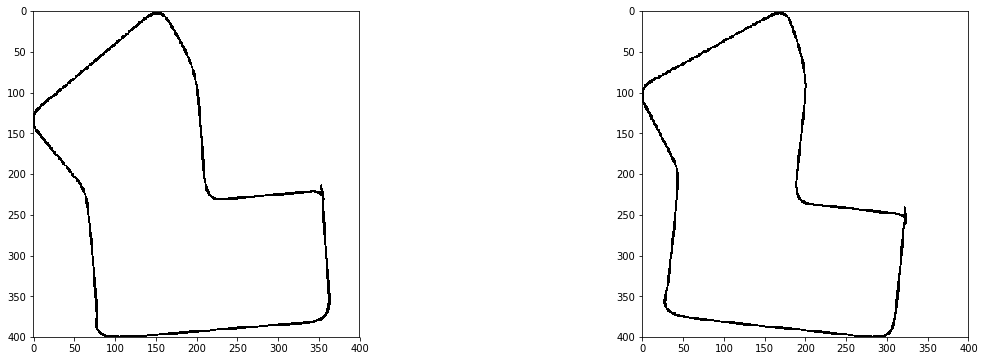

In [23]:
folder = '/data/urbinn/datasets/urb_trajectory_rotationfixed'
folder = '/home/jeroen/notebooks/urb/resultsba'
keyframeids, frameids, poses = load(folder + '/keyframes_%02d_all_17_1.6_1.6.npy'%(sequence))

posesnew = poses
points = transform(poses[:])
coords = plot_trajectory3(points)
p = draw(coords, new_image())

gt = load_csv('/data/urbinn/datasets/kitti/poses/%02d.txt'%(sequence))
pointsgt = transform2(gt)[:]
coordsgt = plot_trajectory3(pointsgt)
show2(draw(coordsgt, new_image()), p)

In [5]:
for i, xy in enumerate(coords):
    print(i, xy[0], xy[1])

0 25.2979057335 400.0
1 24.7012624148 399.390639553
2 24.6198052008 397.999266284
3 24.5175326628 396.632464387
4 24.4424308803 395.251794955
5 24.3710774728 393.858534646
6 24.2977075914 392.45602212
7 24.2156748079 391.060504117
8 24.1286894264 389.70186758
9 24.0436412641 388.327531277
10 23.9732252874 386.941104335
11 23.8883089831 385.55654905
12 23.7983397236 384.158425905
13 23.7252227963 382.780889223
14 23.6243920902 381.396055954
15 23.5322547232 380.018037545
16 23.4379410945 378.630734197
17 23.3303031019 377.264098219
18 23.2351006978 375.8733923
19 23.1408721138 374.464945381
20 23.0496593683 373.072045506
21 22.963868746 371.67888338
22 22.8761102568 370.282396479
23 22.7840531302 368.890978074
24 22.6808731003 367.495638207
25 22.5936519342 366.086235096
26 22.4956897241 364.663457548
27 22.3964988768 363.263209915
28 22.2874256142 361.833629685
29 22.1774261016 360.406478728
30 22.0803186162 358.940096808
31 21.9724340605 357.499366838
32 21.8811413727 356.04106934
33 

In [6]:
p = posesold.copy()
for i in range(1, len(p)):
    p[i] = np.dot( p[i-1], p[i] )
pterug = p.copy()
for i in range(len(p)-1, 0, -1):
    pterug[i] = np.dot( np.linalg.pinv(pterug[i-1]), pterug[i] )

print(posesold[:,2,3])
pterug[:,2,3]

NameError: name 'posesold' is not defined

Show the affine world coodinates for the first 3 poses

In [ ]:
points[:3]

show the converted x,y coordinates to plot the trajectory

In [ ]:
coords[:3]

In [ ]:
show(draw_frame(frame[3281]))